In [1]:
#importing basic libraries for Data Preparation amd EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pwd

'/Users/dheerajdammati/Desktop/final_project'

### **Attribute Information**
<pre>
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]
</pre>

### Data Preparation and Cleaning

In [3]:
data = pd.read_csv('./heart.csv')

In [4]:
data.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [12]:
al = data['Age'].unique().tolist()
for i in al:
    a01=data['Age']==i
    a1=data['HeartDisease']==1
    ac01 =  data[a01].shape[0]
    ac1=data[a01 & a1].shape[0]

In [13]:
data['FastingBS'].unique()

array([0, 1])

In [14]:
l1=data[data['FastingBS']==1].shape[0]
la=data.shape[0]
l1/la*100

23.311546840958606

1/4th of the totalis a considerable count therefore its not required to remove th column FastingBS.

In [15]:
data.shape

(918, 12)

In [16]:
data.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [17]:
data.isnull().any()

Age               False
Sex               False
ChestPainType     False
RestingBP         False
Cholesterol       False
FastingBS         False
RestingECG        False
MaxHR             False
ExerciseAngina    False
Oldpeak           False
ST_Slope          False
HeartDisease      False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


### This shows there is no null values present in the dataset

 ## --------- Performing Exploratory Data Analysis---------

#### Seperating numerical and the categorical columns

In [19]:
cat = [x for x in data.columns if data[x].dtype == 'object'] 
print(cat)
num = [x for x in data.columns if x not in cat] 
print(num)

['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak', 'HeartDisease']


In [20]:
x=data.drop("HeartDisease",axis=1)
y = data['HeartDisease']
y

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

In [21]:
x='Sex'
xa = data['Sex'].unique()
ya = data['HeartDisease'].values
for i in data['Sex'].unique():
    t=data[data['Sex']==i].count()
    t=t['Sex']
    t1=data[(data['Sex']==i) & (data['HeartDisease']==1)].count()
    t1=t1['Sex']
    print(t1/t*100)
    

63.172413793103445
25.906735751295333


## With categorical value types

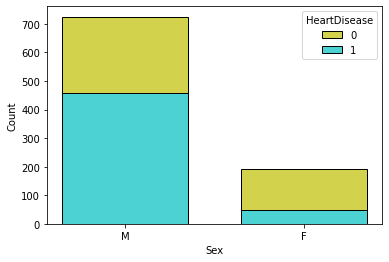

percentage of heart failure among feature M = 63.172413793103445
percentage of heart failure among feature F = 25.906735751295333


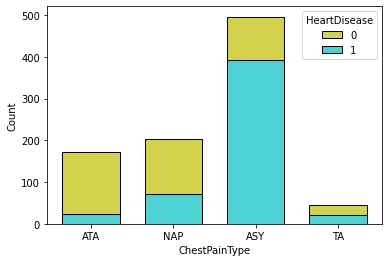

percentage of heart failure among feature ATA = 13.872832369942195
percentage of heart failure among feature NAP = 35.467980295566505
percentage of heart failure among feature ASY = 79.03225806451613
percentage of heart failure among feature TA = 43.47826086956522


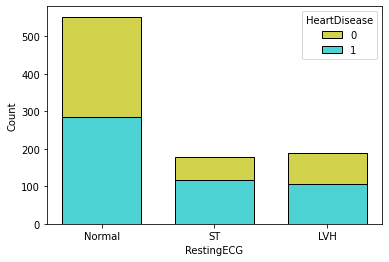

percentage of heart failure among feature Normal = 51.63043478260869
percentage of heart failure among feature ST = 65.73033707865169
percentage of heart failure among feature LVH = 56.38297872340425


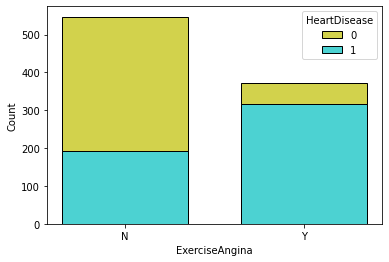

percentage of heart failure among feature N = 35.10054844606947
percentage of heart failure among feature Y = 85.17520215633422


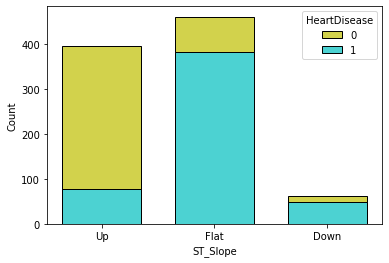

percentage of heart failure among feature Up = 19.746835443037973
percentage of heart failure among feature Flat = 82.82608695652173
percentage of heart failure among feature Down = 77.77777777777779


In [22]:

for x in cat:
    sns.histplot(x=x,data=data, hue='HeartDisease',palette=['y', 'c'],multiple='stack', alpha=0.7, shrink=.7)
    plt.show()
    for i in data[x].unique():
        t=data[data[x]==i].count()
        t=t[x]
        t1=data[(data[x]==i) & (data['HeartDisease']==1)].count()
        t1=t1[x]
        print('percentage of heart failure among feature',i,'=',t1/t*100)
        

<h5>
    <pre>
Sex:- Male has high chances of getting heart disease as compared to females.
ChestPain:- People having ASY type chest pain has high chance of heart Disease while People with the ATA type     chestpain has minimum chance of heart Disease.
ExerciseAngina :- People who has Exercise Angina has high chance of Heart Disease.
ST_Slope:- People with ST_Slop UP has minimum chance of heart Disease
    </pre>
</h5>

## With Numerical value types

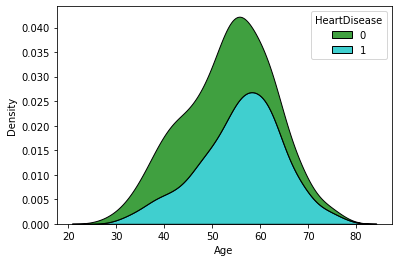

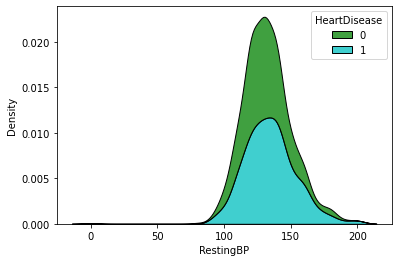

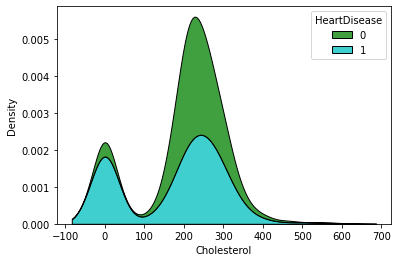

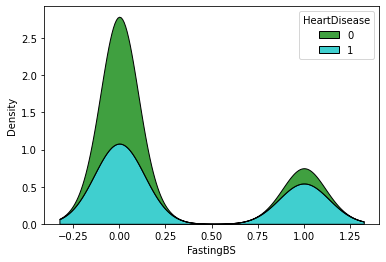

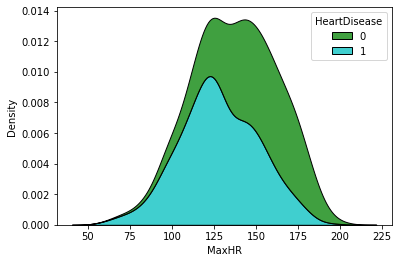

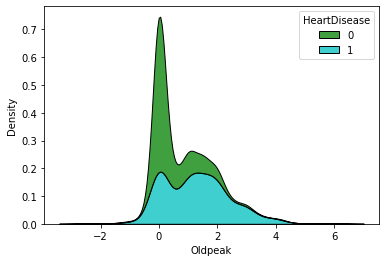

In [23]:
for x in num:
    if x =='HeartDisease':
        continue
    sns.kdeplot(data=data, x=x,hue='HeartDisease',palette=['g', 'c'],multiple="stack")
    plt.show()

<h5>
Let us look at the people’s age who are suffering from the disease or not.
</h5>

In [24]:
al = data['Age'].unique().tolist()
ageper=[]
agenum=[]
agepcount= []
for i in al:
    a01=data['Age']==i
    a1=data['HeartDisease']==1
    ac01 =  data[a01].shape[0]
    ac1=data[a01 & a1].shape[0]
    agepcount.append(ac1)
    agenum.append(ac01)
    ageper.append(ac1/ac01*100)

In [25]:
list1 = list(zip(al,agenum,ageper,agepcount))
df1 = pd.DataFrame(list1,columns =['age','totalcount','percentageof1','agepcount'])

In [26]:
df1=df1.sort_values(['age'])
df1

age  totalcount  percentageof1  agepcount
36   28           1       0.000000          0
34   29           3       0.000000          0
37   30           1       0.000000          0
25   31           2      50.000000          1
19   32           5      40.000000          2
32   33           2      50.000000          1
31   34           7      28.571429          2
21   35          11      36.363636          4
12   36           6      33.333333          2
2    37          11       9.090909          1
9    38          16      68.750000         11
5    39          15      13.333333          2
0    40          13      46.153846          6
18   41          24      25.000000          6
8    42          18      16.666667          3
10   43          24      45.833333         11
13   44          19      31.578947          6
6    45          18      16.666667          3
26   46          24      54.166667         13
24   47          19      57.894737         11
3    48          31      48.387097         15
1    49          21      52.380952         11
23   50          25      56.000000         14
16   51          35      42.857143         15
15   52          36      52.777778         19
14   53          33      45.454545         15
4    54          51      45.098039         23
28   55          41      58.536585         24
17   56          38      65.789474         25
27   57          38      68.421053         26
7    58          42      66.666667         28
22   59          35      65.714286         23
11   60          32      75.000000         24
33   61          31      83.870968         26
35   62          35      71.428571         25
29   63          30      76.666667         23
41   64          22      68.181818         15
20   65          21      71.428571         15
30   66          13      53.846154          7
43   67          15      80.000000         12
39   68          10      60.000000          6
42   69          13      76.923077         10
45   70           7      85.714286          6
49   71           5      40.000000          2
40   72           4      75.000000          3
44   73           1     100.000000          1
38   74           7      71.428571          5
47   75           3      66.666667          2
48   76           2      50.000000          1
46   77           2     100.000000          2

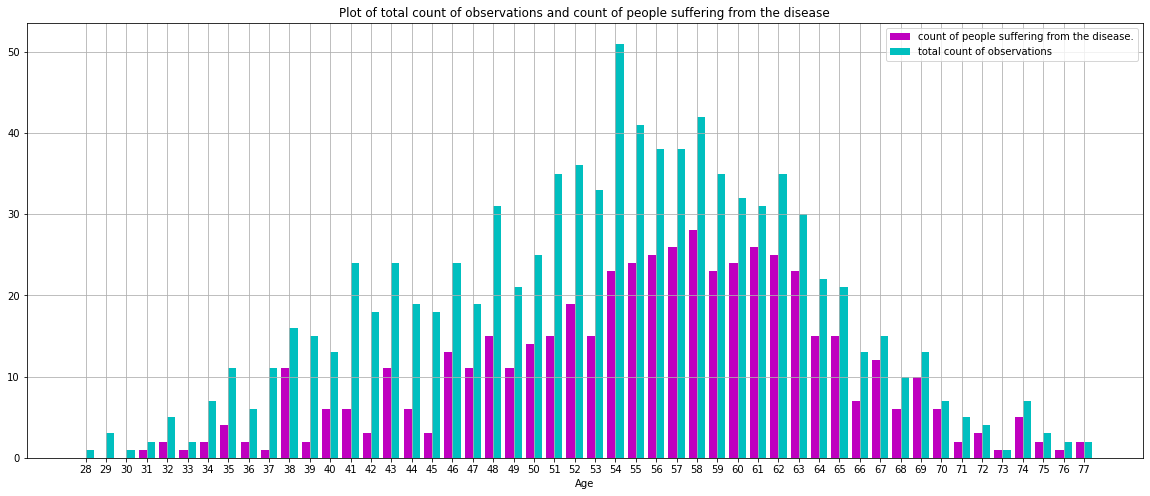

In [27]:
#Total vs youth Unemployment
plt.figure(figsize=(20,8))
plt.bar(df1['age'].values-.2,df1['agepcount'].values,0.4,color='m',label='count of people suffering from the disease.')
plt.bar(df1['age'].values+0.2,df1['totalcount'].values,0.4,color='c',label='total count of observations')
plt.grid(True)
plt.xlabel('Age')
plt.xticks(df1['age'].values)
plt.title('Plot of total count of observations and count of people suffering from the disease')
plt.legend()

We see that most people who are suffering are of the age of 58, followed by 57.
Majorly, people belonging to the age group 50+ are likely to suffer from the disease.

# Correlation

In [28]:
data1 = data.sort_values(['Age'])
data1.head()

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
208   28   M           ATA        130          132          0        LVH   
219   29   M           ATA        140          263          0     Normal   
170   29   M           ATA        120          243          0     Normal   
829   29   M           ATA        130          204          0        LVH   
215   30   F            TA        170          237          0         ST   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
208    185              N      0.0       Up             0  
219    170              N      0.0       Up             0  
170    160              N      0.0       Up             0  
829    202              N      0.0       Up             0  
215    170              N      0.0       Up             0

In [29]:
corr = data1.corr()
corr

Age  RestingBP  Cholesterol  FastingBS     MaxHR   Oldpeak  \
Age           1.000000   0.254399    -0.095282   0.198039 -0.382045  0.258612   
RestingBP     0.254399   1.000000     0.100893   0.070193 -0.112135  0.164803   
Cholesterol  -0.095282   0.100893     1.000000  -0.260974  0.235792  0.050148   
FastingBS     0.198039   0.070193    -0.260974   1.000000 -0.131438  0.052698   
MaxHR        -0.382045  -0.112135     0.235792  -0.131438  1.000000 -0.160691   
Oldpeak       0.258612   0.164803     0.050148   0.052698 -0.160691  1.000000   
HeartDisease  0.282039   0.107589    -0.232741   0.267291 -0.400421  0.403951   

              HeartDisease  
Age               0.282039  
RestingBP         0.107589  
Cholesterol      -0.232741  
FastingBS         0.267291  
MaxHR            -0.400421  
Oldpeak           0.403951  
HeartDisease      1.000000

In [30]:
corrheart = corr['HeartDisease']
corrheart =corrheart[:6]
corrheart

Age            0.282039
RestingBP      0.107589
Cholesterol   -0.232741
FastingBS      0.267291
MaxHR         -0.400421
Oldpeak        0.403951
Name: HeartDisease, dtype: float64

<AxesSubplot:>

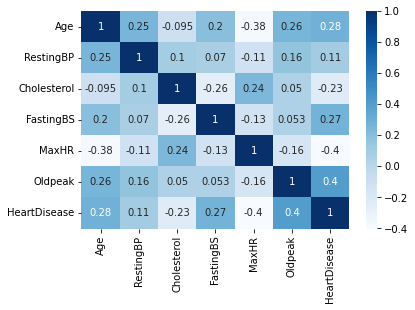

In [31]:
corr = data.corr()
sns.heatmap(corr, cmap="Blues", annot=True)

Text(0.5, 1.0, 'Correlations between input columns and target column HeartDisease')

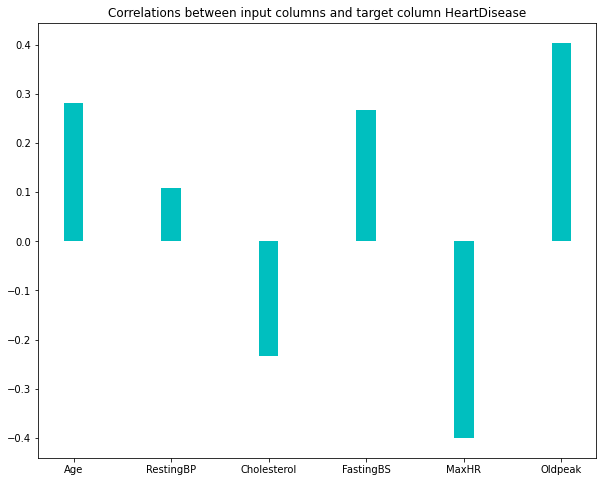

In [32]:
plt.figure(figsize=(10,8))
plt.bar(corrheart.index,corrheart.values,0.2,color='c')
plt.title('Correlations between input columns and target column HeartDisease')

<h3>
<pre>
MaxHR,Oldpeak has some significant correlation to the HeartDisease
with 
MaxHR having correlation coefficient of  -0.400421
and 
Oldpeak having correlation coefficient of  0.403951.
</pre>
    </h3>


<h1 style='background-color: powderblue;'>
    Machine learning
</h1>

In [33]:
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

from sklearn.metrics import accuracy_score, f1_score

data

In [34]:
data

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0     40   M           ATA        140          289          0     Normal   
1     49   F           NAP        160          180          0     Normal   
2     37   M           ATA        130          283          0         ST   
3     48   F           ASY        138          214          0     Normal   
4     54   M           NAP        150          195          0     Normal   
..   ...  ..           ...        ...          ...        ...        ...   
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144          193          1     Normal   
915   57   M           ASY        130          131          0     Normal   
916   57   F           ATA        130          236          0        LVH   
917   38   M           NAP        138          175          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0      172              N      0.0       Up             0  
1      156              N      1.0     Flat             1  
2       98              N      0.0       Up             0  
3      108              Y      1.5     Flat             1  
4      122              N      0.0       Up             0  
..     ...            ...      ...      ...           ...  
913    132              N      1.2     Flat             1  
914    141              N      3.4     Flat             1  
915    115              Y      1.2     Flat             1  
916    174              N      0.0     Flat             1  
917    173              N      0.0       Up             0  

[918 rows x 12 columns]

## Data Preprocessing 

In [35]:
data['Sex']=data['Sex'].replace("M", 1)
data['Sex']=data['Sex'].replace("F", 0)
data.head()

Age  Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40    1           ATA        140          289          0     Normal   
1   49    0           NAP        160          180          0     Normal   
2   37    1           ATA        130          283          0         ST   
3   48    0           ASY        138          214          0     Normal   
4   54    1           NAP        150          195          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0    172              N      0.0       Up             0  
1    156              N      1.0     Flat             1  
2     98              N      0.0       Up             0  
3    108              Y      1.5     Flat             1  
4    122              N      0.0       Up             0

In [36]:
cat1= cat[1:]
cat1

['ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

In [37]:
for x in cat1:
    data[x]=data[x].astype(str)
number = preprocessing.LabelEncoder()
for x in cat1:
    data[x]=number.fit_transform(data[x])
data.head(10)

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   
5   39    1              2        120          339          0           1   
6   45    0              1        130          237          0           1   
7   54    1              1        110          208          0           1   
8   37    1              0        140          207          0           1   
9   48    0              1        120          284          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  HeartDisease  
0    172               0      0.0         2             0  
1    156               0      1.0         1             1  
2     98               0      0.0         2             0  
3    108               1      1.5         1             1  
4    122               0      0.0         2             0  
5    170               0      0.0         2             0  
6    170               0      0.0         2             0  
7    142               0      0.0         2             0  
8    130               1      1.5         1             1  
9    120               0      0.0         2             0

## Splittig the Data into Train and Test

In [38]:
X = data.iloc[:,:-1]
X.head()

Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  RestingECG  \
0   40    1              1        140          289          0           1   
1   49    0              2        160          180          0           1   
2   37    1              1        130          283          0           2   
3   48    0              0        138          214          0           1   
4   54    1              2        150          195          0           1   

   MaxHR  ExerciseAngina  Oldpeak  ST_Slope  
0    172               0      0.0         2  
1    156               0      1.0         1  
2     98               0      0.0         2  
3    108               1      1.5         1  
4    122               0      0.0         2

In [39]:
Y=data.iloc[:,-1:]
Y.head()

HeartDisease
0             0
1             1
2             0
3             1
4             0

In [40]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y, random_state = 10,test_size = 0.3)

# Training the Model

### DecisionTreeClassifier

In [41]:
model_dt = DecisionTreeClassifier(random_state=50)
model_dt = model_dt.fit(X_train,Y_train)
model_dt

DecisionTreeClassifier(random_state=50)

In [42]:
model_dt=model_dt.score(X_test, Y_test)
print(model_dt)

0.782608695652174


In [43]:
model_dt=model_dt.score(X_test, Y_test)
print(model_dt)

AttributeError: 'numpy.float64' object has no attribute 'score'

## k-nearest neighbors

In [44]:
model_knn = KNeighborsClassifier(n_neighbors = 5)
model_knn.fit(X_train, Y_train)

/Users/dheerajdammati/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [45]:
model_knn.score(X_test, Y_test)

/Users/dheerajdammati/opt/anaconda3/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


0.7101449275362319

In [ ]:
klist=[]
for i in range(20):
    model_knn = KNeighborsClassifier(n_neighbors = i+1)
    model_knn.fit(X_train, Y_train)
    klist.append(model_knn.score(X_test, Y_test))
r20=[x+1 for x in range(20) ]

In [47]:
dfplotknn=pd.DataFrame(list(zip(klist,r20)),columns=['accuracy','k-value'])

In [48]:
dfplotknn.head()

accuracy  k-value
0  0.670290        1
1  0.666667        2
2  0.684783        3
3  0.710145        4
4  0.710145        5

### Finding value of K

(0.0, 20.0, 0.5, 0.8)

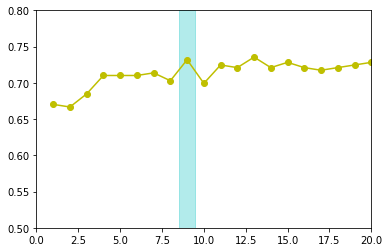

In [49]:
plt.plot(dfplotknn['k-value'].values,dfplotknn['accuracy'].values,'-yo')
plt.axvspan(8.5,9.5, color='c', alpha=0.3)
plt.axis([0,20,0.5,.8])

In [50]:
maxknn=dfplotknn.iloc[8]
maxknn

accuracy    0.731884
k-value     9.000000
Name: 8, dtype: float64

##### value of k = 9

In [51]:
model_dt

0.782608695652174

## Comparing KNN and Decision Tree

([<matplotlib.patches.Wedge at 0x7fdf00119e80>,
 [Text(0.05784471722803564, 1.0984780328658417, 'KNN'),
  Text(-0.05784471722803528, -1.0984780328658417, 'Decision Tree')],
 [Text(0.031551663942564895, 0.5991698361086408, '48.33%'),
  Text(-0.031551663942564694, -0.5991698361086408, '51.67%')])

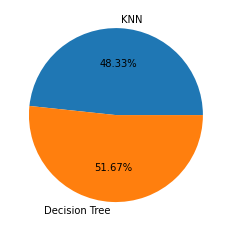

In [52]:
parr = np.array([maxknn[0]*100,model_dt*100]) 
label=['KNN','Decision Tree']
plt.pie(parr,labels=label,autopct='%1.2f%%')

# -------------------------------- THE END ---------------------------------------